# Tips for creating column tables

In [199]:
using CategoricalArrays
using CSV
using DataFrames
using FreqTables
using Parameters 
using Pipe
using Plots
using RDatasets
using StringEncodings
using StatsBase
using StatsPlots

In [2]:
ENV["COLUMNS"] = 1000
ENV["LINES"] = 50

50

# about RDatasets
- Rdataset : https://vincentarelbundock.github.io/Rdatasets/datasets.html

In [345]:
dfs = RDatasets.datasets()
cond = dfs.Package .== "datasets"
@pipe dfs[cond,:] |> first(_,5)

,Package,Dataset,Title,Rows,Columns
,String,String,String,Int64,Int64
1,datasets,BOD,Biochemical Oxygen Demand,6,2
2,datasets,CO2,Carbon Dioxide Uptake in Grass Plants,84,5
3,datasets,Formaldehyde,Determination of Formaldehyde,6,2
4,datasets,HairEyeColor,Hair and Eye Color of Statistics Students,32,4
5,datasets,InsectSprays,Effectiveness of Insect Sprays,72,2


In [4]:
dfs.Package |> unique |> println

["COUNT", "Ecdat", "HSAUR", "HistData", "ISLR", "KMsurv", "MASS", "SASmixed", "Zelig", "adehabitatLT", "boot", "car", "cluster", "datasets", "gap", "ggplot2", "lattice", "lme4", "mgcv", "mlmRev", "nlreg", "plm", "plyr", "pscl", "psych", "quantreg", "reshape2", "robustbase", "rpart", "sandwich", "sem", "survival", "vcd", "gamair"]


# Overview 
- Data cleaning and data exploring process. 
    - check column names 
    - check values in one columns 
    - value patterns over multiple columns. 
    - outliers for continuous variables (done in univariate analysis). 
- Data analsysis for logistic regression. 
    - check the distribution for one variables. (Univariate analysis)
        - Cont. : historgrams, kernel density, 
        - Disc. : bar graph
    - chech the distribution for two variables. (Bivariate analysis)
        - Cont. - cont.: scatter, 2D histogram, heatmap, contour plot, 
        - Cont. - discrete: area plot, 
        - Disc. - cont.: boxplot, violinplot, swarmplot, 
        - Disc. - discrete: stacked bar plot, 
    - Stratification
        - Gridset
    - Multivariate analysis (logistic regression)
        - Disc. variables (categorical variables) -> one hot encodings.
        - Cont. var. -> discrete var. 

# Data cleaning and data exploring process
Data doc: https://vincentarelbundock.github.io/Rdatasets/doc/AER/Affairs.html

In [74]:
path = "./Affairs.csv"
df = read(path) |> CSV.File |> DataFrame
df |> size |> println
first(df, 5)

(601, 10)


,Column1,affairs,gender,age,yearsmarried,children,religiousness,education,occupation,rating
,Int64,Int64,String,Float64,Float64,String,Int64,Int64,Int64,Int64
1,4,0,male,37.0,10.0,no,3,18,7,4
2,5,0,female,27.0,4.0,no,4,14,6,4
3,11,0,female,32.0,15.0,yes,1,12,1,4
4,16,0,male,57.0,15.0,yes,5,18,6,5
5,23,0,male,22.0,0.75,no,2,17,6,3


In [51]:
describe(df)

,variable,mean,min,median,max,nmissing,eltype
,Symbol,Union…,Any,Union…,Any,Int64,DataType
1,Column1,1059.72,4,1009.0,9029,0,Int64
2,affairs,1.45591,0,0.0,12,0,Int64
3,gender,,female,,male,0,String
4,age,32.4875,17.5,32.0,57.0,0,Float64
5,yearsmarried,8.1777,0.125,7.0,15.0,0,Float64
6,children,,no,,yes,0,String
7,religiousness,3.11647,1,3.0,5,0,Int64
8,education,16.1664,9,16.0,20,0,Int64
9,occupation,4.19468,1,5.0,7,0,Int64


## check unique values 

In [52]:
names(df) |> println
for c in names(df)
    println("="^50)
    println(c)
    df[:,c] |> unique |> println
end


["Column1", "affairs", "gender", "age", "yearsmarried", "children", "religiousness", "education", "occupation", "rating"]
Column1
[4, 5, 11, 16, 23, 29, 44, 45, 47, 49, 50, 55, 64, 80, 86, 93, 108, 114, 115, 116, 123, 127, 129, 134, 137, 139, 147, 151, 153, 155, 162, 163, 165, 168, 170, 172, 184, 187, 192, 194, 210, 217, 220, 224, 227, 228, 239, 241, 245, 249, 262, 265, 267, 269, 271, 277, 290, 292, 293, 295, 299, 320, 321, 324, 334, 351, 355, 361, 362, 366, 370, 374, 378, 381, 382, 383, 384, 400, 403, 409, 412, 413, 416, 418, 422, 435, 439, 445, 447, 448, 449, 478, 482, 486, 489, 490, 491, 492, 503, 508, 509, 512, 515, 517, 532, 533, 535, 537, 538, 543, 547, 550, 558, 571, 578, 583, 586, 594, 597, 602, 603, 604, 612, 613, 621, 627, 630, 631, 632, 639, 645, 647, 648, 651, 655, 667, 670, 671, 673, 701, 705, 706, 709, 717, 719, 723, 724, 726, 734, 735, 736, 737, 739, 743, 745, 747, 751, 752, 754, 760, 763, 774, 776, 779, 784, 788, 794, 795, 798, 800, 803, 807, 812, 820, 823, 830, 843, 84

In [53]:
for c in names(df)
    println("="^50)
    println(c)
    df[:,c] |> countmap |> println
end

Column1
Dict(719 => 1, 1299 => 1, 1438 => 1, 823 => 1, 1437 => 1, 1370 => 1, 1704 => 1, 422 => 1, 1266 => 1, 224 => 1, 1039 => 1, 1050 => 1, 1276 => 1, 1285 => 1, 172 => 1, 526 => 1, 1669 => 1, 366 => 1, 1814 => 1, 116 => 1, 1102 => 1, 79 => 1, 1905 => 1, 1859 => 1, 528 => 1, 1861 => 1, 535 => 1, 1896 => 1, 1075 => 1, 448 => 1, 1873 => 1, 436 => 1, 154 => 1, 1504 => 1, 1807 => 1, 1245 => 1, 245 => 1, 1138 => 1, 1916 => 1, 325 => 1, 1341 => 1, 1621 => 1, 1221 => 1, 558 => 1, 1497 => 1, 1670 => 1, 351 => 1, 1808 => 1, 1056 => 1, 1236 => 1, 1070 => 1, 786 => 1, 1548 => 1, 162 => 1, 1045 => 1, 537 => 1, 93 => 1, 1336 => 1, 1157 => 1, 1073 => 1, 1282 => 1, 885 => 1, 807 => 1, 987 => 1, 217 => 1, 1304 => 1, 726 => 1, 412 => 1, 876 => 1, 1585 => 1, 1719 => 1, 1259 => 1, 1935 => 1, 1818 => 1, 1021 => 1, 80 => 1, 795 => 1, 490 => 1, 508 => 1, 667 => 1, 908 => 1, 1054 => 1, 1908 => 1, 723 => 1, 1637 => 1, 929 => 1, 367 => 1, 1344 => 1, 1698 => 1, 186 => 1, 547 => 1, 1208 => 1, 717 => 1, 1333 => 

### check each frequencies 

In [54]:
df |> names

10-element Vector{String}:
 "Column1"
 "affairs"
 "gender"
 "age"
 "yearsmarried"
 "children"
 "religiousness"
 "education"
 "occupation"
 "rating"

In [55]:
cols = ["affairs", "gender", "religiousness"]
l = df[:,cols] |> eachrow .|> values |> countmap
for ll in l
    println(ll)
end

(7, "female", 4) => 4
(12, "male", 3) => 4
(1, "male", 1) => 3
(2, "male", 5) => 1
(12, "male", 2) => 7
(3, "male", 4) => 1
(3, "male", 1) => 2
(2, "female", 4) => 2
(7, "male", 3) => 7
(0, "male", 5) => 28
(12, "female", 2) => 5
(7, "male", 2) => 7
(12, "female", 3) => 7
(0, "female", 4) => 76
(2, "male", 3) => 2
(1, "female", 5) => 4
(2, "male", 2) => 3
(7, "female", 2) => 7
(7, "female", 3) => 6
(0, "male", 3) => 32
(2, "female", 2) => 1
(0, "male", 2) => 49
(2, "female", 3) => 1
(1, "male", 5) => 1
(0, "female", 2) => 74
(1, "female", 4) => 3
(3, "male", 5) => 1
(0, "female", 3) => 54
(12, "male", 4) => 4
(3, "female", 4) => 5
(12, "male", 1) => 2
(1, "male", 3) => 5
(12, "female", 1) => 4
(1, "male", 2) => 4
(7, "male", 4) => 2
(3, "male", 3) => 4
(7, "male", 1) => 2
(3, "male", 2) => 3
(2, "male", 4) => 3
(1, "female", 2) => 2
(7, "female", 1) => 3
(2, "male", 1) => 1
(12, "female", 5) => 1
(1, "female", 3) => 6
(3, "female", 2) => 2
(2, "female", 1) => 3
(0, "male", 4) => 81
(3,

# Univariate analysis

In [182]:
describe(df) |> display
# since yearsmarried is categorical variables. 
df[!, "affairs"] = CategoricalArray(df[:,"affairs"], levels=[0,1, 2,  3, 7, 12])
df[!,"yearsmarried"] = string.(df[:,"yearsmarried"])
describe(df) |> display

,variable,mean,min,median,max,nmissing,eltype
,Symbol,Union…,Any,Union…,Any,Int64,DataType
1,Column1,1059.72,4,1009.0,9029,0,Int64
2,affairs,,0,,12,0,"CategoricalValue{Int64, UInt32}"
3,gender,,female,,male,0,String
4,age,32.4875,17.5,32.0,57.0,0,Float64
5,yearsmarried,,0.125,,7.0,0,String
6,children,,no,,yes,0,String
7,religiousness,3.11647,1,3.0,5,0,Int64
8,education,16.1664,9,16.0,20,0,Int64
9,occupation,4.19468,1,5.0,7,0,Int64


,variable,mean,min,median,max,nmissing,eltype
,Symbol,Union…,Any,Union…,Any,Int64,DataType
1,Column1,1059.72,4,1009.0,9029,0,Int64
2,affairs,,0,,12,0,"CategoricalValue{Int64, UInt32}"
3,gender,,female,,male,0,String
4,age,32.4875,17.5,32.0,57.0,0,Float64
5,yearsmarried,,0.125,,7.0,0,String
6,children,,no,,yes,0,String
7,religiousness,3.11647,1,3.0,5,0,Int64
8,education,16.1664,9,16.0,20,0,Int64
9,occupation,4.19468,1,5.0,7,0,Int64


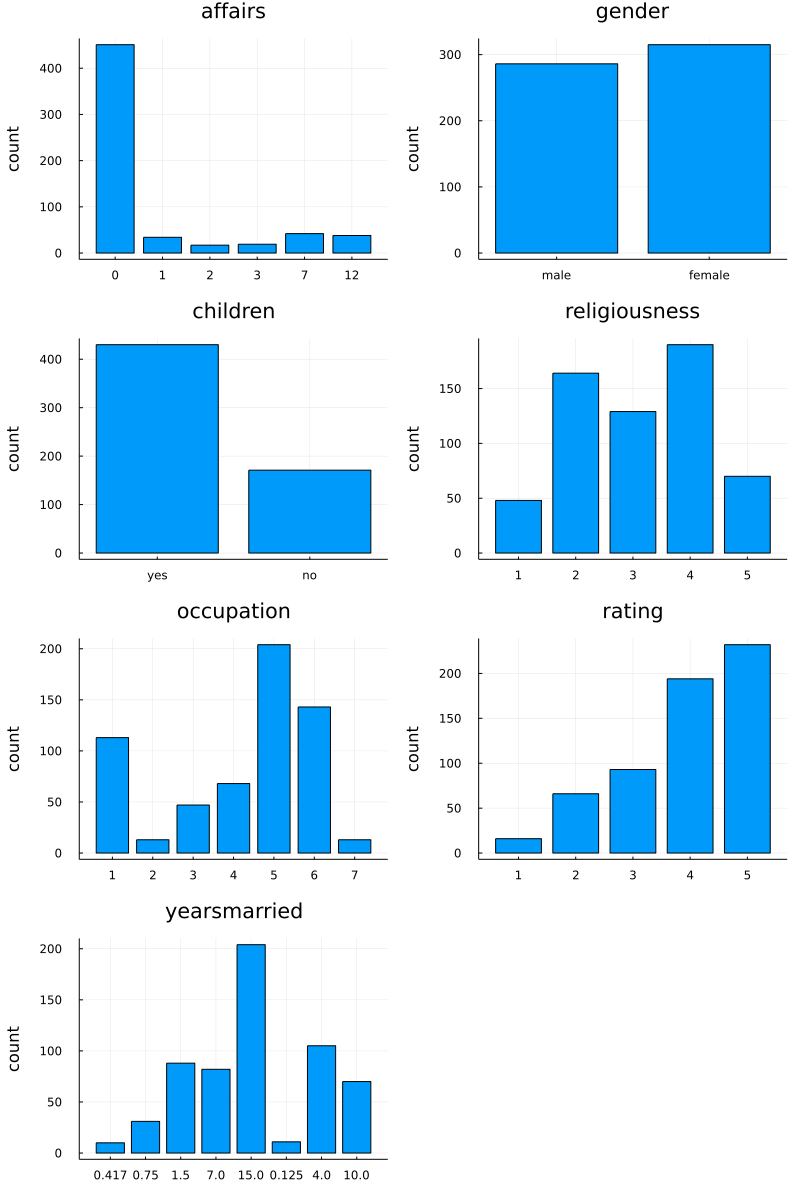

In [183]:
# Discrete variables
cols = ["affairs", "gender", "children","religiousness", "occupation", "rating", "yearsmarried"]
ps = []
for c in cols
    p = @pipe df[:,c] |>  countmap |> bar(_, title=c)
    push!(ps,p)
end
plot(ps..., layout=(:,2),legend=:none, size=(800,1200), left_margins=6Plots.mm)
ylabel!("count")

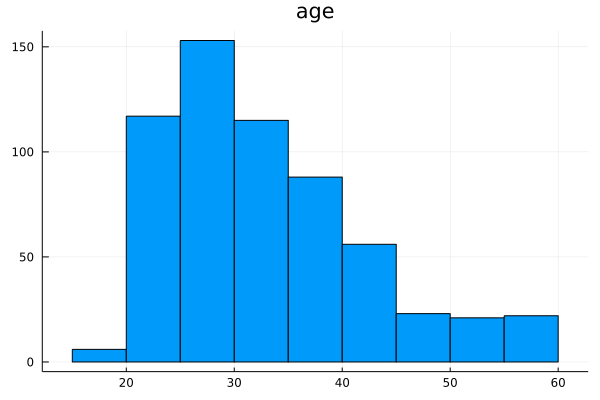

In [77]:
# continuous variables, actually, this is not a continous variable. 
histogram(df.age, legend=:none, title="age")

# Bivariate analysis 

##  cont. to cont.

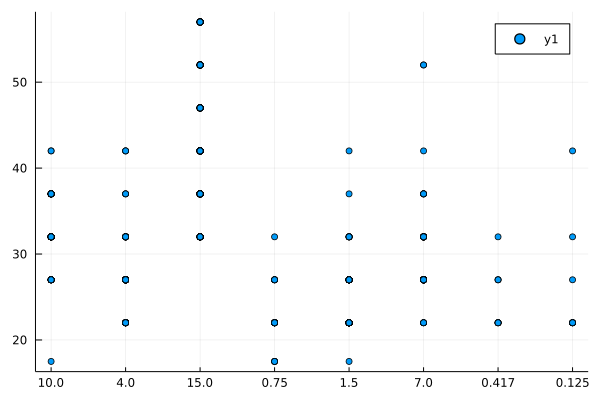

In [80]:
scatter(df.yearsmarried, df.age)

## disc. to disc. 

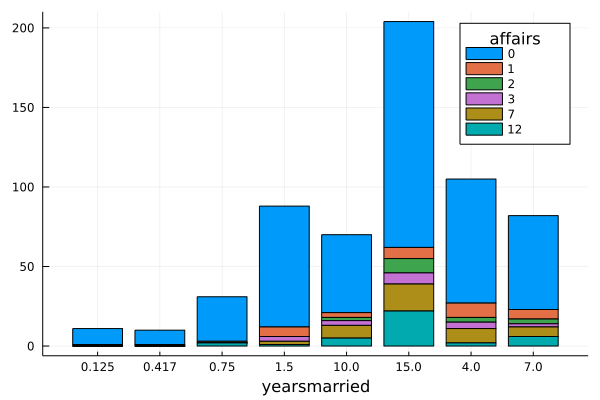

In [193]:
# disc. to disc.
df[!, "count"] .= 1
x = :yearsmarried
y = :affairs
cnts = combine(groupby(df, [x, y]), nrow)
groupedbar(cnts[:,x], cnts.nrow, group=cnts[:,y], bar_position = :stack, legendtitle=y, xlabel=x)

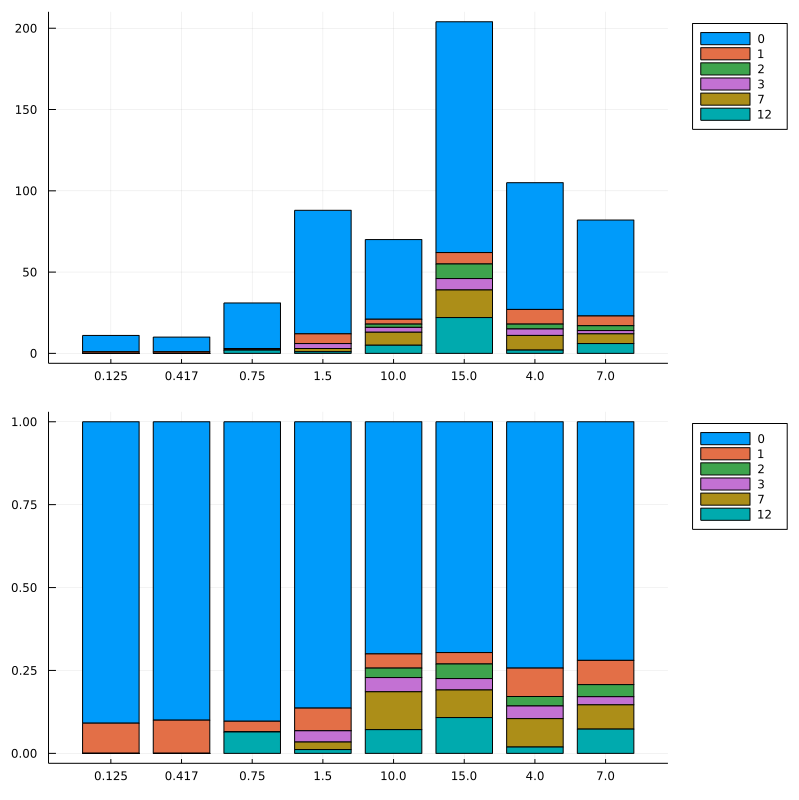

In [338]:
table = freqtable(df[:,x], df[:,y])
legend = names(table)[2]
xticks = names(table)[1]
n = length(xticks)
p1 = groupedbar(table, bar_position=:stack, labels=legend |> Array |> transpose, xticks=(1:n, xticks))
table_prop = @pipe freqtable(df[:,x], df[:,y]) |> prop(_,margins=1)
p2 = groupedbar(table_prop, bar_position=:stack, labels=legend |> Array |> transpose, xticks=(1:n, xticks))
plot(p1,p2, layout=(2,1), size=(800,800), legend=:outertopright)

In [343]:
table |> transpose

6×8 Named Matrix{Int64}
                       Dim2 ╲ Dim1 │ 0.125  0.417   0.75    1.5   10.0   15.0    4.0    7.0
───────────────────────────────────┼───────────────────────────────────────────────────────
CategoricalValue{Int64, UInt32} 0  │    10      9     28     76     49    142     78     59
CategoricalValue{Int64, UInt32} 1  │     1      1      1      6      3      7      9      6
CategoricalValue{Int64, UInt32} 2  │     0      0      0      0      2      9      3      3
CategoricalValue{Int64, UInt32} 3  │     0      0      0      3      3      7      4      2
CategoricalValue{Int64, UInt32} 7  │     0      0      0      2      8     17      9      6
CategoricalValue{Int64, UInt32} 12 │     0      0      2      1      5     22      2      6

In [336]:
cols = names(table)[2]
rows = names(table)[1]
df_table = DataFrame(table |> Array, :auto )#, rows=names(table)[1])
re_ = Dict(c1 => c2 for (c1,c2) in zip(names(df_table),cols |> Array .|> string))
rename!(df_table, re_)
insertcols!(df_table, 1 , :index=> rows)
#CSV.write("./test.csv",df_table)

,index,0,1,2,3,7,12
,String,Int64,Int64,Int64,Int64,Int64,Int64
1,0.125,10,1,0,0,0,0
2,0.417,9,1,0,0,0,0
3,0.75,28,1,0,0,0,2
4,1.5,76,6,0,3,2,1
5,10.0,49,3,2,3,8,5
6,15.0,142,7,9,7,17,22
7,4.0,78,9,3,4,9,2
8,7.0,59,6,3,2,6,6


## Disc. to cont. 

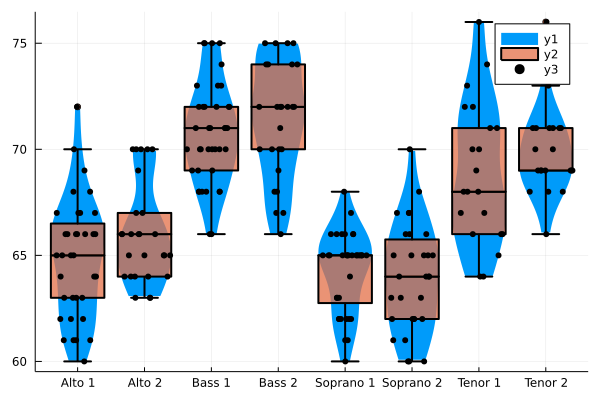

In [339]:
singers = RDatasets.dataset("lattice", "singer")
@df singers violin(string.(:VoicePart), :Height, linewidth=0)
@df singers boxplot!(string.(:VoicePart), :Height, fillalpha=0.75, linewidth=2)
@df singers dotplot!(string.(:VoicePart), :Height, marker=(:black, stroke(0)))

# Multivariate analysis

In [385]:
using GLM
using Lathe

In [433]:
data = DataFrame(X=[1,2,2], Y=[1,0,1])
logit =  glm(@formula(Y ~ X), data, Binomial(), LogitLink())

StatsModels.TableRegressionModel{GeneralizedLinearModel{GLM.GlmResp{Vector{Float64}, Binomial{Float64}, LogitLink}, GLM.DensePredChol{Float64, LinearAlgebra.Cholesky{Float64, Matrix{Float64}}}}, Matrix{Float64}}

Y ~ 1 + X

Coefficients:
────────────────────────────────────────────────────────────────────────
                Coef.  Std. Error      z  Pr(>|z|)  Lower 95%  Upper 95%
────────────────────────────────────────────────────────────────────────
(Intercept)   29.1321    1765.49    0.02    0.9868   -3431.16    3489.42
X            -14.5661     882.745  -0.02    0.9868   -1744.71    1715.58
────────────────────────────────────────────────────────────────────────

In [434]:
fieldnames(StatsModels.TableRegressionModel)

(:model, :mf, :mm)

In [435]:
@show coef(logit)
@show confint(logit)
@show stderror(logit)
@show predict(logit)
@show deviance(logit)
@show aic(logit)
@show bic(logit)
@show coefnames(logit)

coef(logit) = [29.132135553523838, -14.566067776761919]
confint(logit) = [-3431.159420410417 3489.4236915174647; -1744.7135109899318 1715.581375436408]
stderror(logit) = [1765.4873167355488, 882.7445079911413]
predict(logit) = [0.9999995278968083, 0.5, 0.5]
deviance(logit) = 2.7725896664463874
aic(logit) = 6.772589666446388
bic(logit) = 4.969814243782607
coefnames(logit) = ["(Intercept)", "X"]


2-element Vector{String}:
 "(Intercept)"
 "X"

## Practice 

In [468]:
path = "./Affairs.csv"
df = read(path) |> CSV.File |> DataFrame
allowmissing!(df)
describe(df)
n = size(df)[1]
bin = (rand(n) .> 0.95) 
df[bin,"rating"]  .= missing
df[bin,"yearsmarried"]  .= missing
size(df) |> println
describe(df)

(601, 10)


,variable,mean,min,median,max,nmissing,eltype
,Symbol,Union…,Any,Union…,Any,Int64,Union
1,Column1,1059.72,4,1009.0,9029,0,"Union{Missing, Int64}"
2,affairs,1.45591,0,0.0,12,0,"Union{Missing, Int64}"
3,gender,,female,,male,0,"Union{Missing, String}"
4,age,32.4875,17.5,32.0,57.0,0,"Union{Missing, Float64}"
5,yearsmarried,8.15349,0.125,7.0,15.0,29,"Union{Missing, Float64}"
6,children,,no,,yes,0,"Union{Missing, String}"
7,religiousness,3.11647,1,3.0,5,0,"Union{Missing, Int64}"
8,education,16.1664,9,16.0,20,0,"Union{Missing, Int64}"
9,occupation,4.19468,1,5.0,7,0,"Union{Missing, Int64}"


In [469]:
df.affairs |> countmap

Dict{Union{Missing, Int64}, Int64} with 6 entries:
  0  => 451
  7  => 42
  2  => 17
  12 => 38
  3  => 19
  1  => 34

In [470]:
cond = df.affairs .!= 0
df[!,"affairs_once"] .= 0
df[cond, "affairs_once"] .= 1
first(df)

,Column1,affairs,gender,age,yearsmarried,children,religiousness,education,occupation,rating,affairs_once
,Int64?,Int64?,String?,Float64?,Float64?,String?,Int64?,Int64?,Int64?,Int64?,Int64
1,4,0,male,37.0,10.0,no,3,18,7,4,0


In [471]:
cols = ["religiousness", "education", "rating", "occupation"]# "yearsmarried"]
for c in cols
    df[!,c] = string.(df[:,c])
end
describe(df)

,variable,mean,min,median,max,nmissing,eltype
,Symbol,Union…,Any,Union…,Any,Int64,Type
1,Column1,1059.72,4,1009.0,9029,0,"Union{Missing, Int64}"
2,affairs,1.45591,0,0.0,12,0,"Union{Missing, Int64}"
3,gender,,female,,male,0,"Union{Missing, String}"
4,age,32.4875,17.5,32.0,57.0,0,"Union{Missing, Float64}"
5,yearsmarried,8.15349,0.125,7.0,15.0,29,"Union{Missing, Float64}"
6,children,,no,,yes,0,"Union{Missing, String}"
7,religiousness,,1,,5,0,String
8,education,,12,,9,0,String
9,occupation,,1,,7,0,String


In [472]:
join(cols, " + ")

"religiousness + education + rating + occupation"

In [473]:
fml = @formula(affairs_once ~ religiousness + education + rating + occupation + yearsmarried)
logit =  glm(fml, df, Binomial(), LogitLink())

StatsModels.TableRegressionModel{GeneralizedLinearModel{GLM.GlmResp{Vector{Float64}, Binomial{Float64}, LogitLink}, GLM.DensePredChol{Float64, LinearAlgebra.Cholesky{Float64, Matrix{Float64}}}}, Matrix{Float64}}

affairs_once ~ 1 + religiousness + education + rating + occupation + yearsmarried

Coefficients:
────────────────────────────────────────────────────────────────────────────────
                       Coef.  Std. Error      z  Pr(>|z|)  Lower 95%   Upper 95%
────────────────────────────────────────────────────────────────────────────────
(Intercept)        0.029443    0.780974    0.04    0.9699  -1.50124    1.56012
religiousness: 2  -0.897687    0.383124   -2.34    0.0191  -1.6486    -0.146777
religiousness: 3  -0.49149     0.385306   -1.28    0.2021  -1.24667    0.263696
religiousness: 4  -1.39736     0.39195    -3.57    0.0004  -2.16557   -0.629154
religiousness: 5  -1.39498     0.47141    -2.96    0.0031  -2.31892   -0.471029
education: 14     -0.197412    0.424542   -0.47 

In [482]:
@show size(df)
@show predict(logit) |> length
odds =  @show exp.(coef(logit))

size(df) = (601, 11)
predict(logit) |> length = 572
exp.(coef(logit)) = [1.029880721839808, 0.407511213680163, 0.6117145645334615, 0.2472482741748201, 0.24783898861078277, 0.8208520821932311, 0.7727657535047225, 1.5820510498472997, 1.0995510963688873, 1.2021577445952063, 0.5283921775329575, 1.1572247261267024, 0.4836627330059135, 0.3684248891156797, 0.21559329455605383, 2.0541399717278965, 1.696597945730847, 1.9304363259283162, 1.0331788165155673, 1.213638150876597, 1.9589850611267434, 1.05924506634394]


22-element Vector{Float64}:
 1.029880721839808
 0.407511213680163
 0.6117145645334615
 0.2472482741748201
 0.24783898861078277
 0.8208520821932311
 0.7727657535047225
 1.5820510498472997
 1.0995510963688873
 1.2021577445952063
 0.5283921775329575
 1.1572247261267024
 0.4836627330059135
 0.3684248891156797
 0.21559329455605383
 2.0541399717278965
 1.696597945730847
 1.9304363259283162
 1.0331788165155673
 1.213638150876597
 1.9589850611267434
 1.05924506634394